<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/EDA-airbnb/blob/main/Ali_Asgar_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for <u>security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.</u> </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import numpy as np
import pandas as pd
pd.get_option("display.max_columns")
pd.get_option("display.max_rows")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_directory = '/content/drive/MyDrive/Colab Notebooks/Capstone EDA/Copy of Airbnb NYC 2019.csv'
df = pd.read_csv(working_directory)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
#removing the nan values from the data
host_name_drop_na=df.loc[~df['host_name'].isna()]
host_name_drop_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48874 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48874 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48874 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48874 non-null  object 
 5   neighbourhood                   48874 non-null  object 
 6   latitude                        48874 non-null  float64
 7   longitude                       48874 non-null  float64
 8   room_type                       48874 non-null  object 
 9   price                           48874 non-null  int64  
 10  minimum_nights                  48874 non-null  int64  
 11  number_of_reviews               48874 non-null  int64  
 12  last_review                     

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31435 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21367 missing from current font.
  font.set_

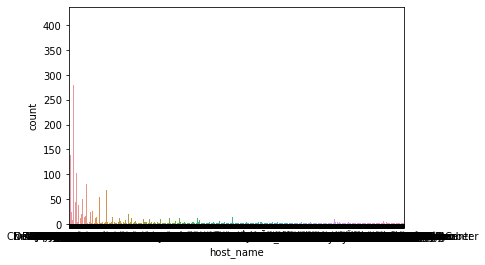

In [ ]:
sns.countplot(host_name_drop_na['host_name'])

In [ ]:
df['host_name'].value_counts().index[:4].tolist()

['Michael', 'David', 'Sonder (NYC)', 'John']

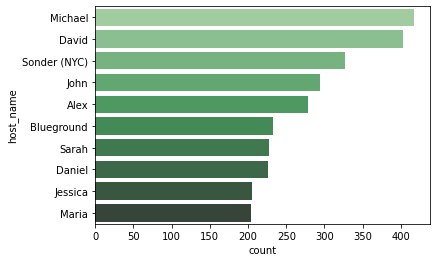

In [ ]:
#ploting acount plot of the top 10 host of hotels
sns.countplot(y="host_name", data=host_name_drop_na, palette="Greens_d",
              order=host_name_drop_na.host_name.value_counts().iloc[:10].index)

In [ ]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

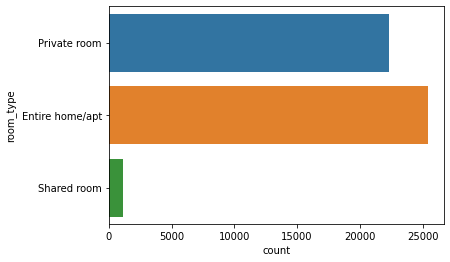

In [ ]:
sns.countplot(y=df['room_type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


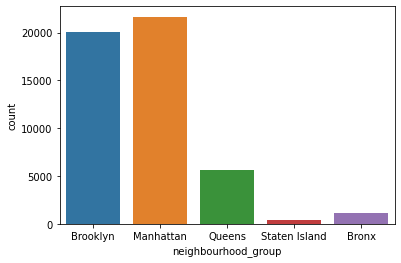

In [ ]:
sns.countplot(df.neighbourhood_group)

In [ ]:
# sns.countplot(y=df.loc[df['neighbourhood_group']== 'Brooklyn'].neighbourhood)
# sns.set(rc={'figure.figsize':(10,10)})

In [ ]:
brooklyn_group_df=df.loc[df['neighbourhood_group']== 'Brooklyn']

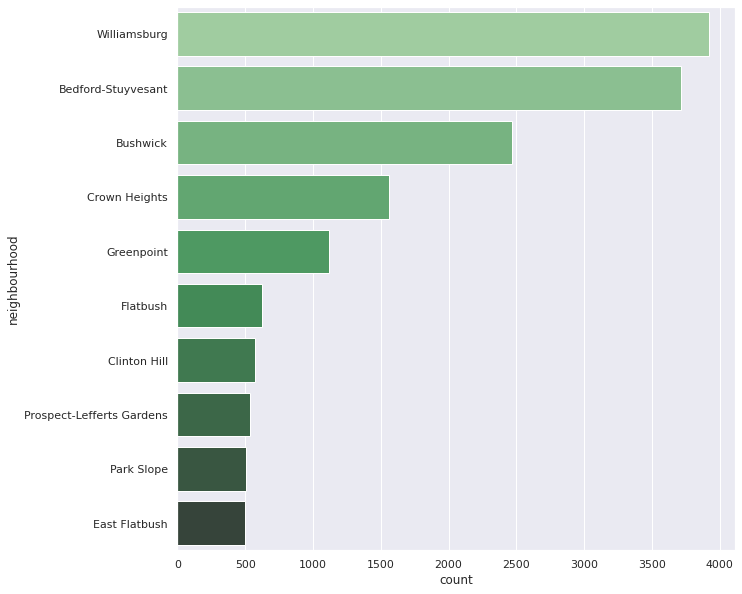

In [ ]:
# top 10 areas in brooklyn with most booking
sns.countplot(y="neighbourhood", data=brooklyn_group_df, palette="Greens_d",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index)

as you can see from the above graph we can see that willamsburg, bedford and bushwick are the most famous neighbourhood in brooklyn

In [ ]:
manhattan_group_df=df.loc[df['neighbourhood_group']== 'Manhattan']

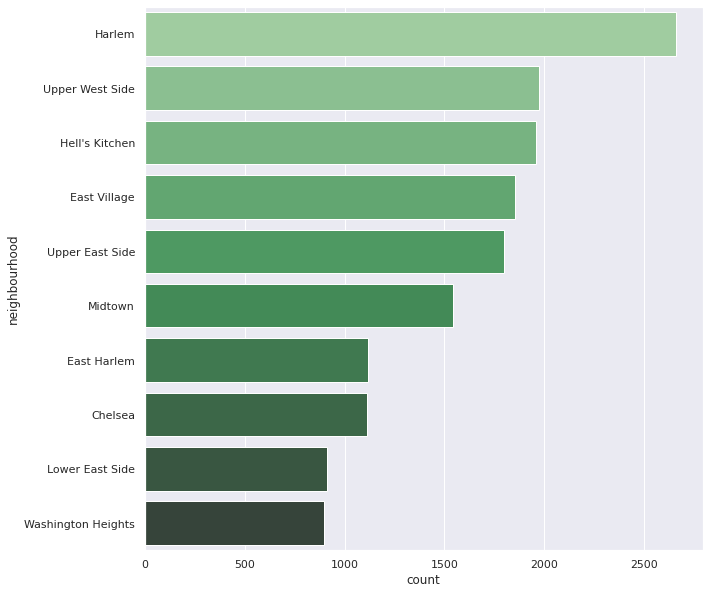

In [ ]:
sns.countplot(y="neighbourhood", data=manhattan_group_df, palette="Greens_d",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index)

as you can see from the above graph we can see that Harlem, Upper West Side and Hell's Kitchen are the most famous neighbourhood in manhattan

In [ ]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


from the abouve graph we can conclude that the top 4 host have most of their houses in brooklyn and manhattan

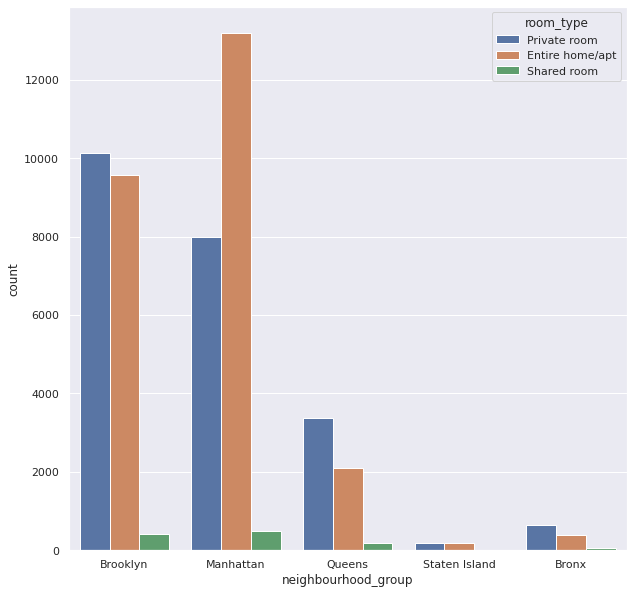

In [ ]:
sns.countplot(data=df,x='neighbourhood_group',hue='room_type')

this graph shows the number of hoses with their types in respective areas

by this graph we can conclude that in manhattan people prefer to book entire home rather than private room nad in brooklyn both have aprox equal no of count while people donot prefer shared room in either of the city 

In [ ]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [ ]:
df.groupby(by='room_type').agg({'price':'median'}).sort_values('price',ascending=False).reset_index()

,room_type,price
0,Entire home/apt,160
1,Private room,70
2,Shared room,45


In [ ]:
df.groupby('neighbourhood_group').agg({'price':'median'}).sort_values('price',ascending=False).reset_index()

,neighbourhood_group,price
0,Manhattan,150
1,Brooklyn,90
2,Queens,75
3,Staten Island,75
4,Bronx,65


In [ ]:
df.groupby('host_name').agg({'price':'median','reviews_per_month':'max'}).sort_values(['price','reviews_per_month'],ascending=[False,False]).reset_index()[:10]

,host_name,price,reviews_per_month
0,Olson,9999.0,0.02
1,Rum,8500.0,0.18
2,Jay And Liz,6000.0,0.27
3,Sarah-B,5000.0,0.38
4,Sarah-2,5000.0,0.18
5,Nony,4200.0,NaN
6,Luxury Property,3000.0,0.15
7,Rogelio,2999.0,NaN
8,Viberlyn,2995.0,1.00
9,Ilo And Richard,2990.0,4.36


In [ ]:
df['total_profit']=df['price']*df['reviews_per_month']

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,total_profit
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,31.29
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,85.50
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,412.96
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,8.00


In [ ]:
host_profit_df=df.groupby('host_name').agg({'total_profit':'sum'}).sort_values(['total_profit'],ascending=[False]).reset_index()[:10]

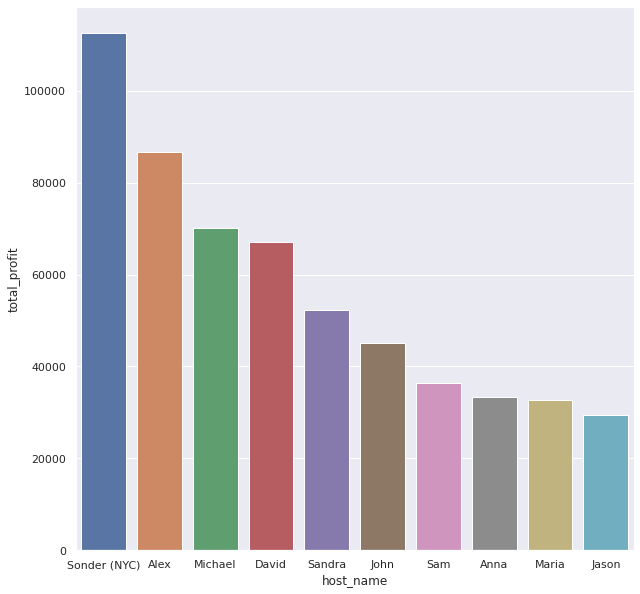

In [ ]:
sns.barplot(x='host_name',y='total_profit',data=host_profit_df)

this graph shows the total profit of top 10 hosts based on the revies per month and price

In [ ]:
df.groupby('host_name').agg({'reviews_per_month':'max','price':'median'}).sort_values(['reviews_per_month'],ascending=[False])

,reviews_per_month,price
host_name,,
Row NYC,58.50,199.0
Louann,20.94,75.0
Nalicia,19.75,50.0
Danielle,16.22,109.5
Brent,15.78,99.5
...,...,...
韦达,NaN,1350.0
馨惠,NaN,55.0
단비,NaN,150.0


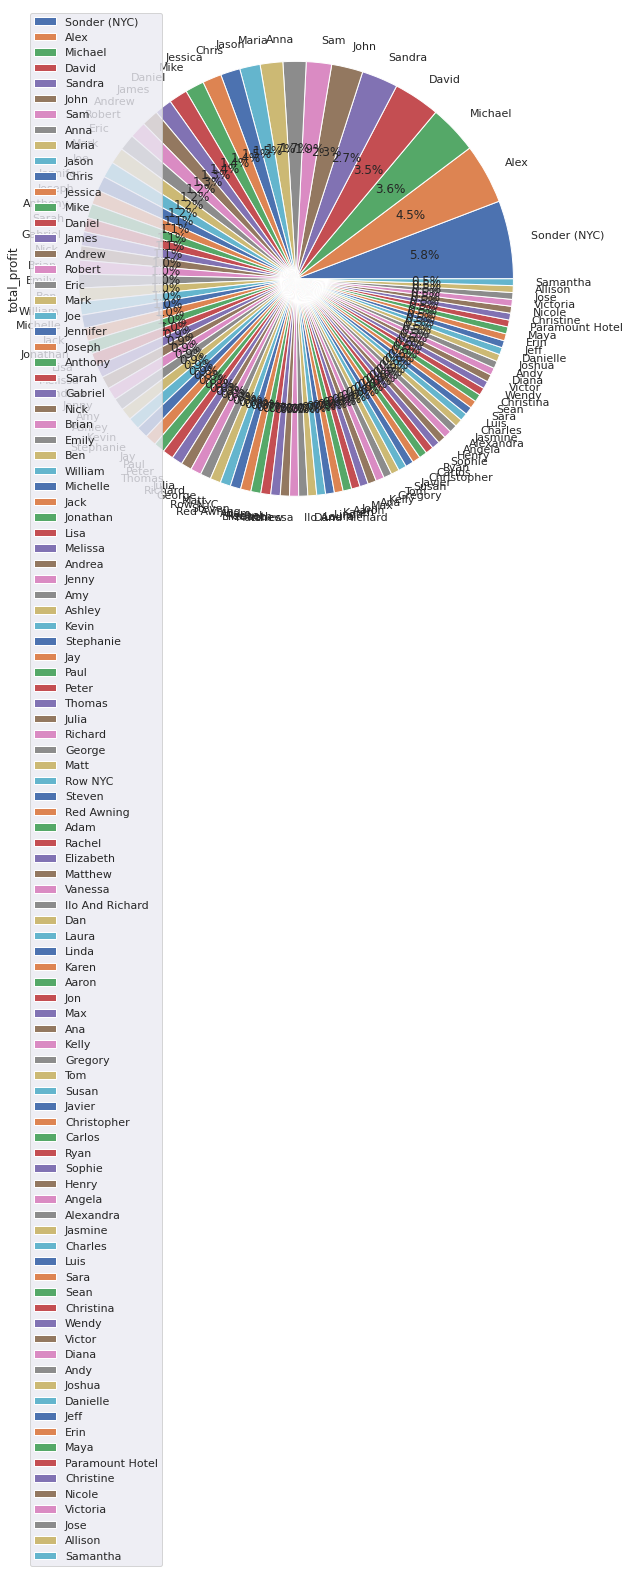

In [ ]:
all_host_profit_df=df.groupby('host_name').agg({'total_profit':'sum'}).sort_values(['total_profit'],ascending=[False])[:100]
all_host_profit_df.plot.pie(y='total_profit',autopct="%.1f%%");

In [ ]:
['Michael', 'David', 'Sonder (NYC)', 'John','Sandra','Alex']

In [ ]:
michael_df['price'].describe()

count     417.000000
mean      160.419664
std       151.987059
min        25.000000
25%        75.000000
50%       120.000000
75%       198.000000
max      1700.000000
Name: price, dtype: float64

In [ ]:
# top 6 hosts and why 
top_6_hosts = df[df['host_name'].isin(['Michael', 'David', 'Sonder (NYC)', 'John','Sandra','Alex'])]


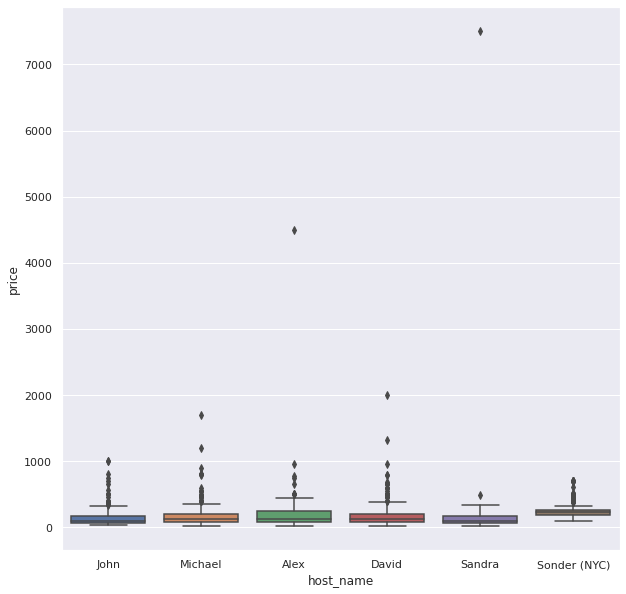

In [ ]:
sns.boxplot(y=top_6_hosts['price'],x=top_6_hosts['host_name'])

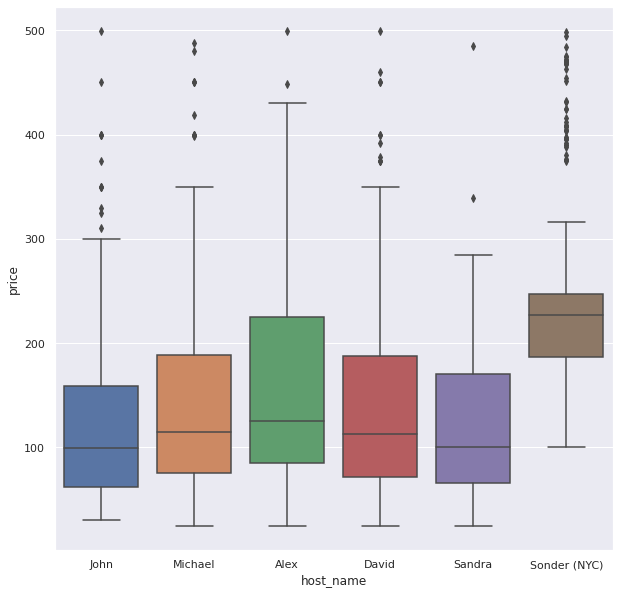

In [ ]:
# alex and sandadra are in the list because they have house whose price are above 4500 and 7500
# removing sandra and alex outliers 
top_6_hosts_remove_outlier = top_6_hosts.loc[top_6_hosts['price']<500]
sns.boxplot(y=top_6_hosts_remove_outlier['price'],x=top_6_hosts_remove_outlier['host_name'])

this box plot shows that top 6 hosts range of prices under 500

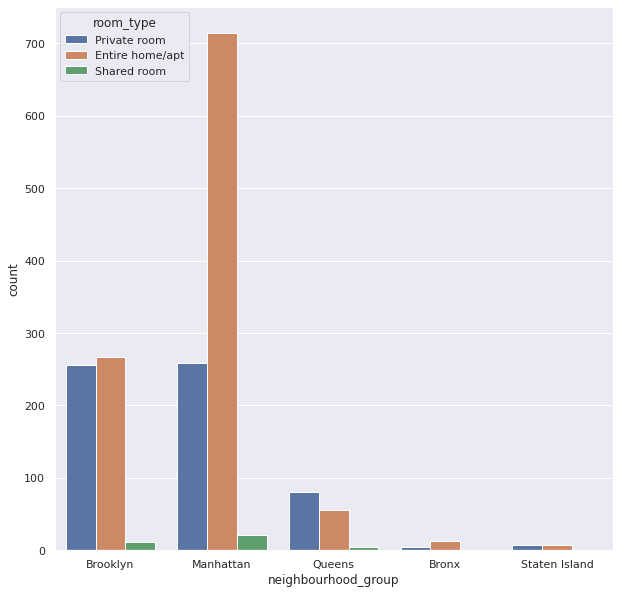

In [ ]:
sns.countplot(data=top_6_hosts_remove_outlier,x='neighbourhood_group',hue='room_type')


this graph shows that where top 6 hosts houses are located

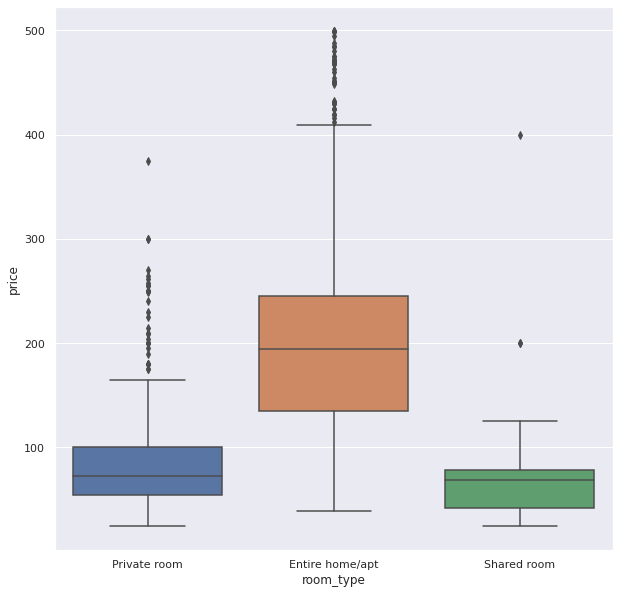

In [ ]:
sns.boxplot(y='price',x='room_type',data=top_6_hosts_remove_outlier)

by this we can conclude that to host a house it is more advisable to host a house in manhattan with entire home /apt with an average price below 200

In [ ]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,total_profit
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,31.29


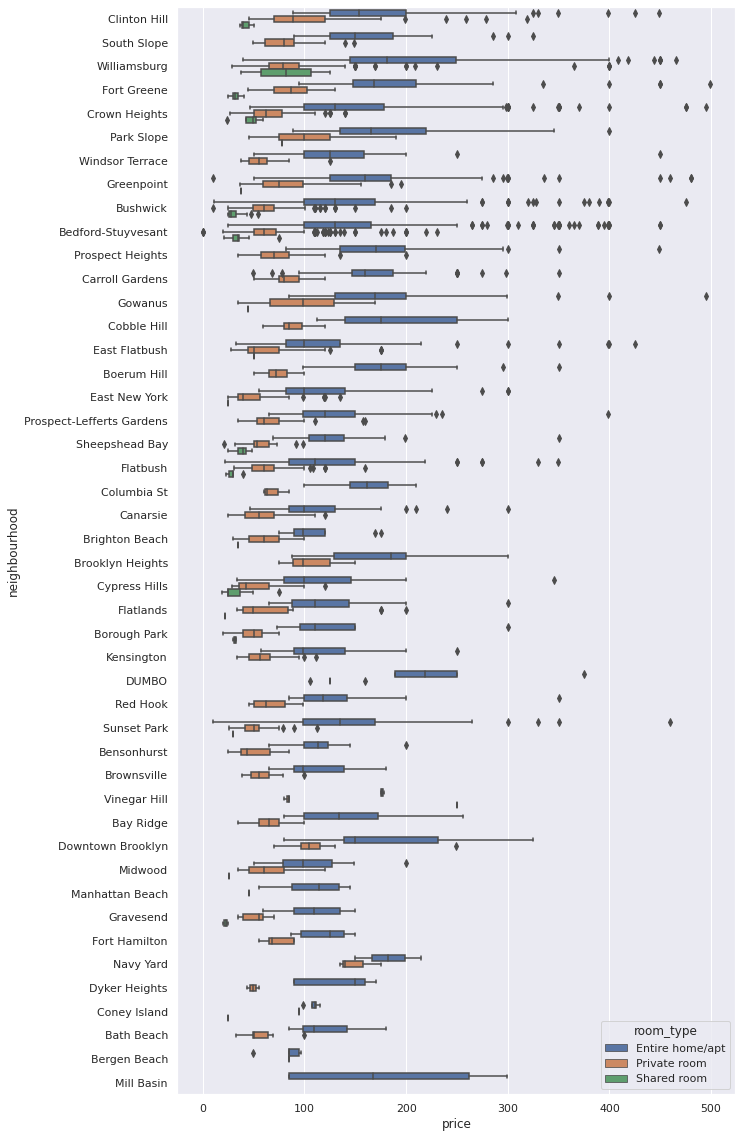

In [ ]:
brooklyn_review_group_df=brooklyn_group_df.loc[brooklyn_group_df['reviews_per_month']>1]
sns.boxplot(y='neighbourhood',hue='room_type',x='price',data=brooklyn_review_group_df.loc[brooklyn_review_group_df['price']<500])
sns.set(rc={'figure.figsize':(10,20)})

In [ ]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,total_profit
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,31.29
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,85.50
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,412.96
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,8.00
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,118.00
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,24.00
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,274.13
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,78.21
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,199.50


In [ ]:
sns.barplot(x='minimum_nights',y='price',data=df.loc[df['minimum_nights']<30])

In [ ]:
profit_min_nights=df.groupby('minimum_nights').agg({'total_profit':'sum'}).reset_index().sort_values(['total_profit'],ascending=False).reset_index()[:20]

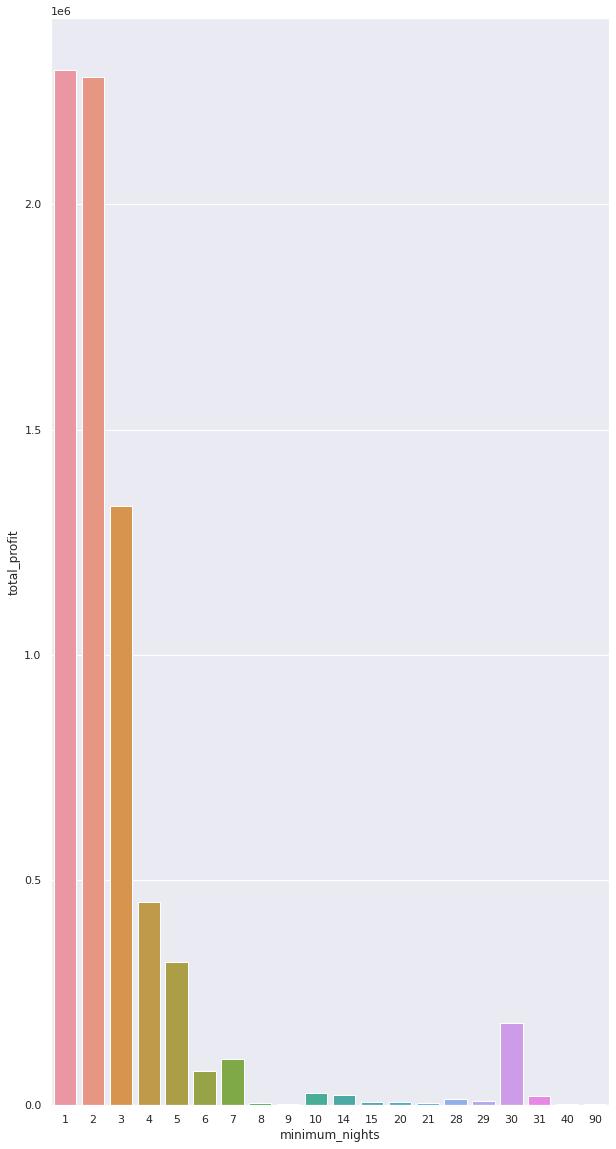

In [ ]:
sns.barplot(x='minimum_nights',y='total_profit',data=profit_min_nights)

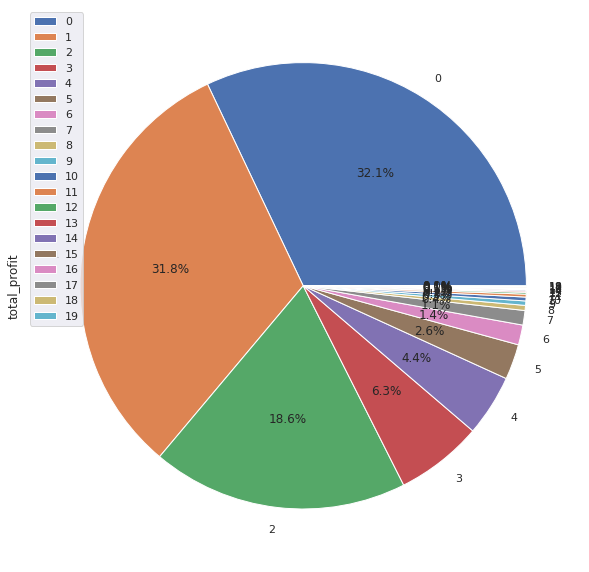

In [ ]:
profit_min_nights.plot.pie(y='total_profit',autopct="%.1f%%");

by the above graph we can conclude that the rooms with min number of days betweent 1 and 3 earn max no of profit 